# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# Running this code on local jupyter notebook.

In [183]:
# Write your code here to read the data
df = pd.read_csv('foodhub_order.csv')

In [184]:
# Write your code here to view the first 5 rows
# By default head returns first 5 rows of the data.
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [185]:
# Write your code here
df.shape

(1898, 9)

#### Observations:


There are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [186]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


| Column_name         | Data type                                                                                                        |
|---------------------|------------------------------------------------------------------------------------------------------------------|
|order_id             | There are no null values and the data type is int64                                                              |
|customer_id          | There are no null values and data type is int64                                                                  |
|restaurant_name      | There are no null values but data type is object rather than string later we need to do that conversion if needed|
|cuisine_type         | There are no null values but data type is object rather than string, we need to do that conversion later on      |
|cost_of_order        | There are no null values and data type is float64.                                                               |
|day_of_the_week      | There are no null values but data type is object, it could be converted to string for better analysis.           |
|rating               |There are no null values but data type is object. Since rating is out of 5 this can be converted of float64.      |
|food_preparation_time| There are no null values and data type is int64.                                                                 |
|delivery_time.       |There are no null values and data type is int64.                                                                  |

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [187]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [190]:
original_count = df.count()
df.drop_duplicates(inplace=True)
new_count = df.count()
print("Count after dropping the duplicate values "+str(new_count[0]))

Count after dropping the duplicate values 1898


#### Observations:


There are no missing values in dataset.
And there are duplicate rows in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [191]:
# Write your code here
# Analyze the statistical summary of the data 
df.describe()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [192]:
minimum = df['food_preparation_time'].min()
print('Minimum time to prepare the food is '+ str(minimum)+ " minutes")
average = df['food_preparation_time'].mean()
print('Average time to prepare the food is '+ str(round(average,2))+ " minutes")
maximum = df['food_preparation_time'].max()
print('Maximum time to prepare the food is '+ str(maximum)+ " minutes")

Minimum time to prepare the food is 20 minutes
Average time to prepare the food is 27.37 minutes
Maximum time to prepare the food is 35 minutes


#### Observations:


Average cost of the order is 16.49 $.\
Average time to prepare the food is 27.37 minutes. \
Average delivery time is 24.16 minutes. \
Minimum time to prepare the food is 20 minutes.\
Average time to prepare the food is 27.37 minutes.\
Maximum time to prepare the food is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [195]:
# Write the code here
count = df.loc[df['rating']== 'Not given'].count()
print(str(count[0]) + " orders are not rated.")
total_count = df.count()[0]
percentage_not_rated = (count/total_count)*100
print("Percentage of orders which are not rated are" + str(percentage_not_rated[0]))

736 orders are not rated.
Percentage of orders which are not rated are38.77766069546891


#### Observations:


Orders which are not rated has the string value "Not given".\
There are 736 orders which are not rated.\
This makes almost 39% orders which are not rated. This is quite a large number of orders which are not rated, we should look into getting this data.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

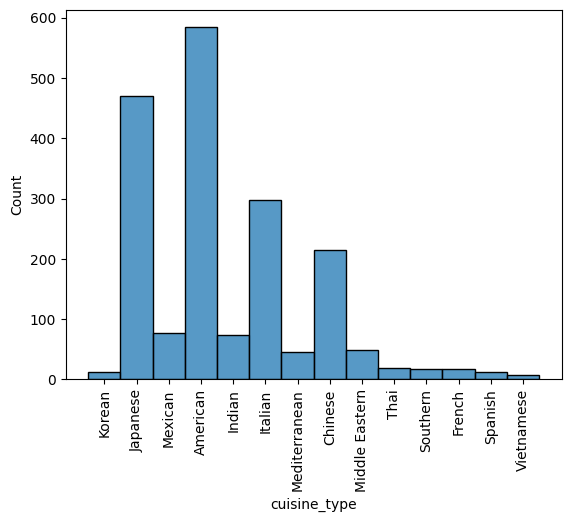

In [196]:
# Write the code here
# Let's start analyzing data Categorical data
sns.histplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Observations:** \
There are 14 cuisine_types and american is the most popular cuisine.

<Axes: xlabel='day_of_the_week', ylabel='Count'>

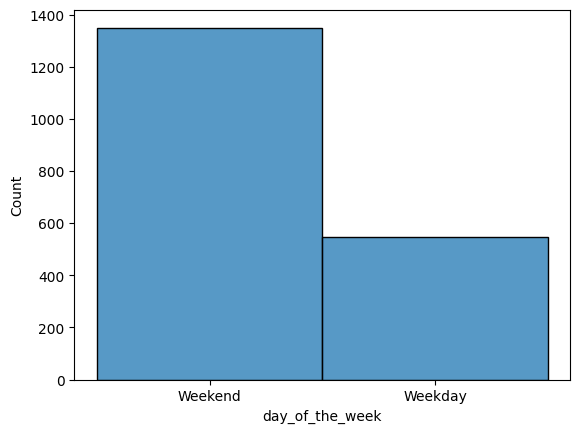

In [200]:
sns.histplot(data=df,x='day_of_the_week')

**Observations:**\
Most of the orders are placed over weekend as compared to the weekdays.

<Axes: xlabel='rating', ylabel='count'>

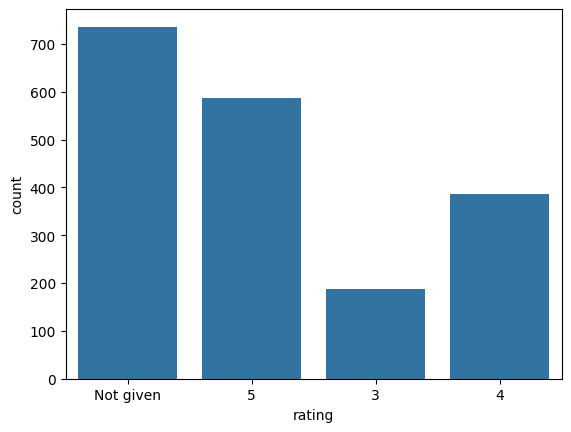

In [201]:
sns.countplot(data=df,x='rating')

**Observations:**\
There are 4 unique rating values - "Not given", 5, 3 and 4 \
Most of the orders are not rated.

<Axes: xlabel='cost_of_the_order'>

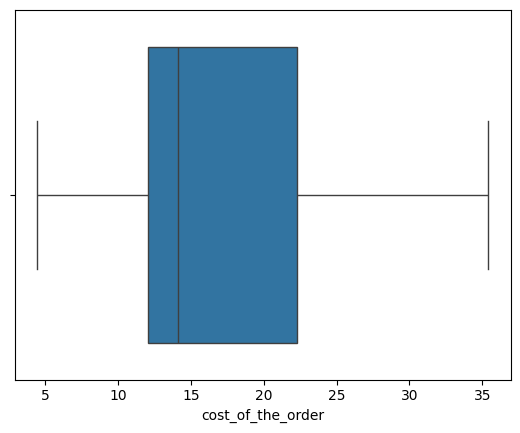

In [161]:
sns.boxplot(data=df,x='cost_of_the_order')

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

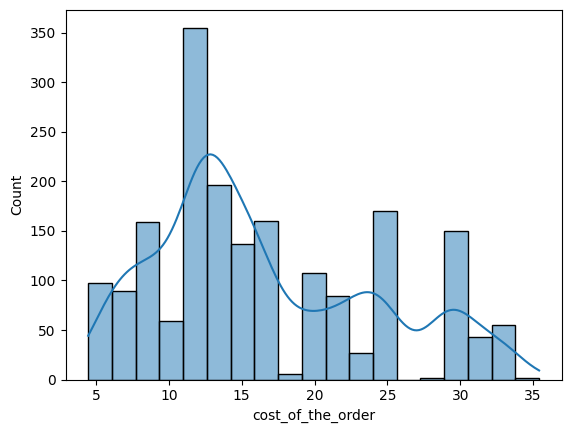

In [203]:
sns.histplot(data=df,x='cost_of_the_order',kde=True)

**Observations:** 
Using the box plot we can say that 50% of the orders are distributed between 12$ to 23$ (IQR)

<Axes: xlabel='food_preparation_time'>

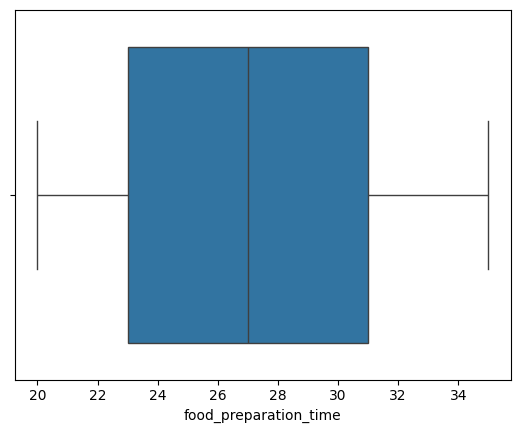

In [162]:
sns.boxplot(data=df,x='food_preparation_time')

<Axes: xlabel='food_preparation_time', ylabel='Count'>

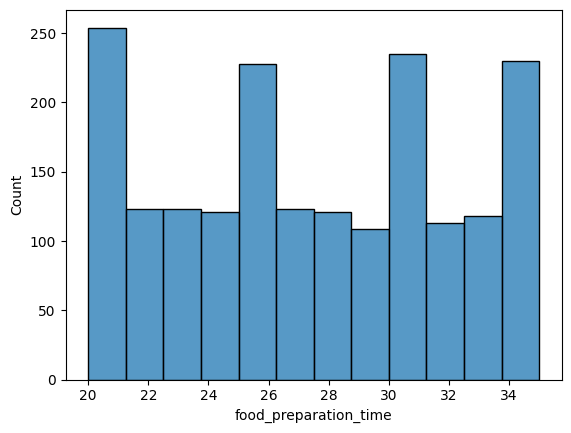

In [205]:
sns.histplot(data=df,x='food_preparation_time')

<Axes: xlabel='delivery_time'>

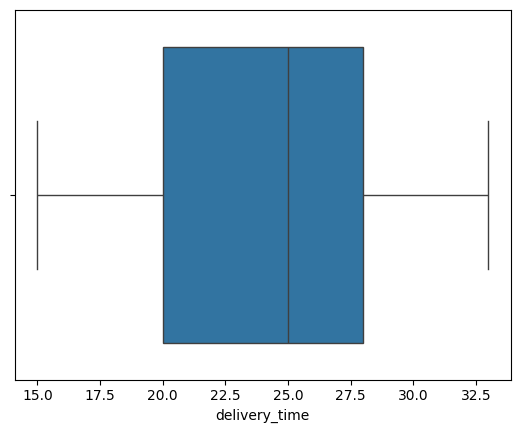

In [206]:
sns.boxplot(data=df,x='delivery_time')

<Axes: xlabel='delivery_time', ylabel='Count'>

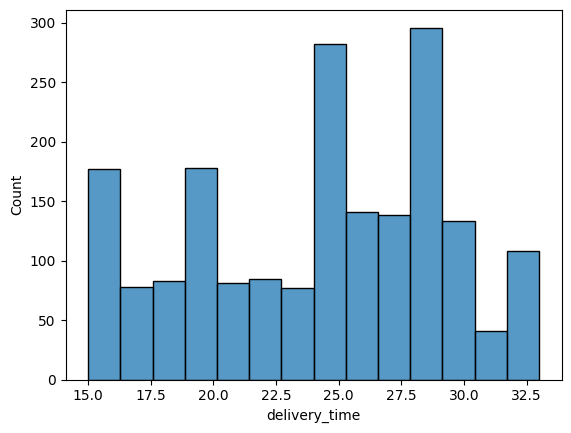

In [207]:
sns.histplot(data=df,x='delivery_time')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [164]:
# Write the code here
data = df['restaurant_name'].value_counts()
# head by default gives the first 5 restaurant names.
# Top 5 restaurants in terms of the order received are
data.head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


Top 5 restaurants in terms of the number of orders received.\
Shake Shack               219 orders \
The Meatball Shop         132 orders\
Blue Ribbon Sushi         119 orders\
Blue Ribbon Fried Chicken 96 orders\
Parm                      68 orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [212]:
# Write the code here
# data = df.loc[df['day_of_the_week']=='Weekend']
# most_popular_cuisine = data['cuisine_type'].value_counts().index[0]
most_popular_cuisine = df.loc[df['day_of_the_week'] == 'Weekend', 'cuisine_type'].value_counts()
cusine_name = most_popular_cuisine.idxmax()
print(str(cusine_name) + " is the most popular cuisine on the weekends.")
print ("Order count for this cuisine is "+ str(most_popular_cuisine[0]))

American is the most popular cuisine on the weekends.
Order count for this cuisine is 415


#### Observations:


American is the most popular cuisine on the weekends.\
Order count for this cuisine is 415.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [214]:
# Write the code here
more_than_twenty = df.loc[df['cost_of_the_order']>20].shape[0]
percentage = (more_than_twenty/df.shape[0])*100
print(str(round(percentage,2)) + "% of the orders cost more than 20 dollars")

29.24% of the orders cost more than 20 dollars


#### Observations:


That means about 70% of the orders cost less than 20 dollars.\
Company can look into increasing this number by giving some discounts to the customers whose orders cost more than 20 dollars to increase the overall profit.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [215]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print("Mean order delivery time is "+ str(round(mean_delivery_time,2))+ " minutes.")

Mean order delivery time is 24.16 minutes.


#### Observations:


Mean delivery time is 24.16 minutes. \
Company can look into why this number is so high and can work towards decreasing it.\
Note: Look into if delivery time and ratings are related.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [219]:
# Write the code here
data = df['customer_id'].value_counts()
unique_customers = data.count()
print("Total unique customers are "+str(unique_customers))
# Top 3 most frequent customers are
data.head(3)

Total unique customers are 1200


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


Top 3 most frequent customers are \
| Customer_id | order_count |
|-------------|-------------|
| 52832       | 13          |
| 47440       | 10          |
| 83287       | 9           |

Another thing to note here is there are 1200 unique customers for 1898 total orders.\
That shows 63% orders are from unique customers and 36 % orders are placed by repeat customers. \
Company can look into retaining customers and provide some initiatives for them to order again and again.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


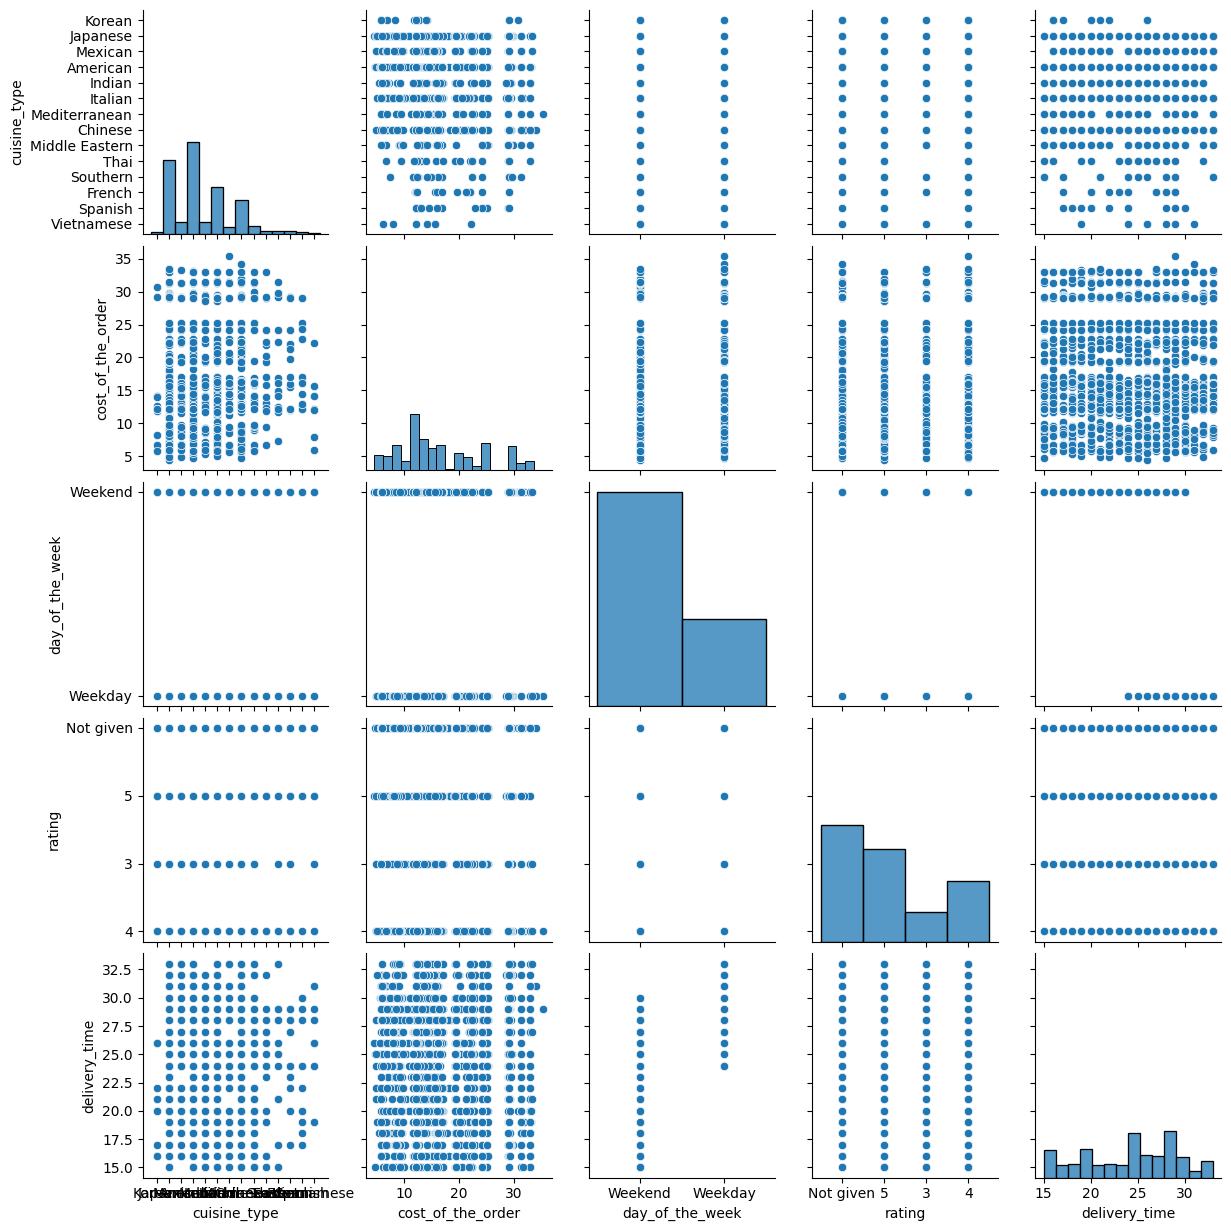

In [169]:
sns.pairplot(data=df,vars=['cuisine_type','cost_of_the_order','day_of_the_week','rating','delivery_time'])

**Observations:**\
Pairplot does not give direct indication as to what all factors can be related.\
Next let's analyze cost of the order and how it might be related to other columns.\
After that let's analyze ratings and how it might be related to other columns in given dataset.

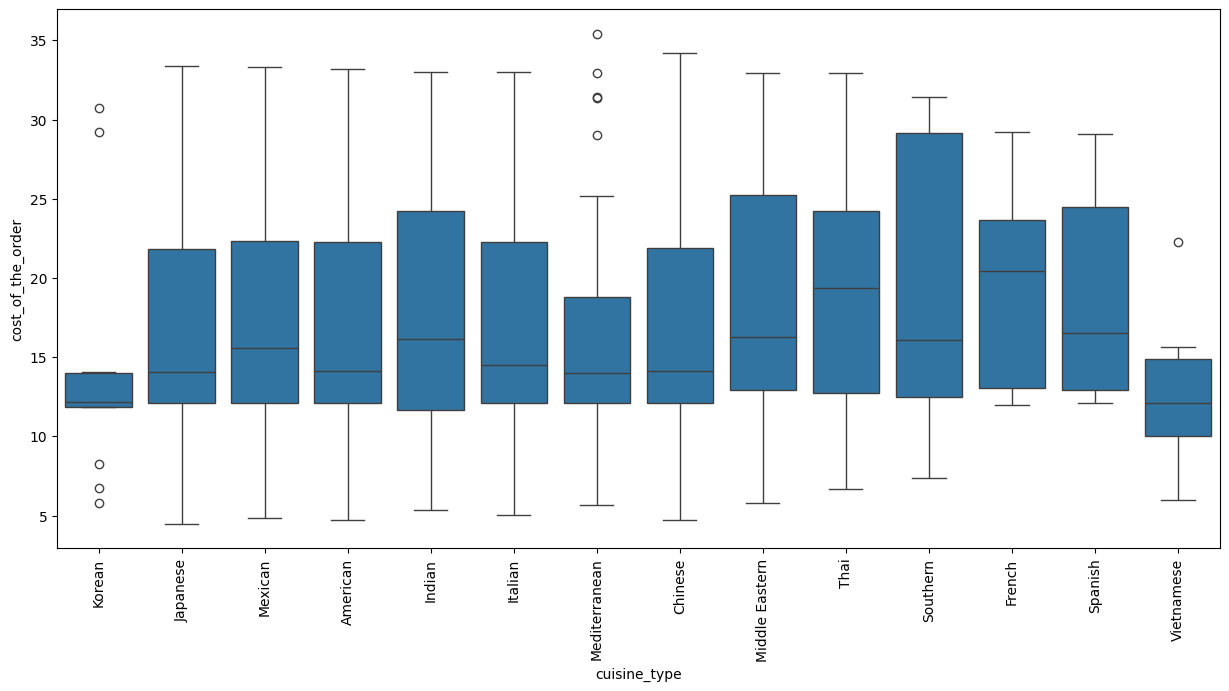

In [228]:
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type',y='cost_of_the_order',data=df)
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Observations:**\
There are outliers for Korean, Mediterranean and Vietnamese cuisines.

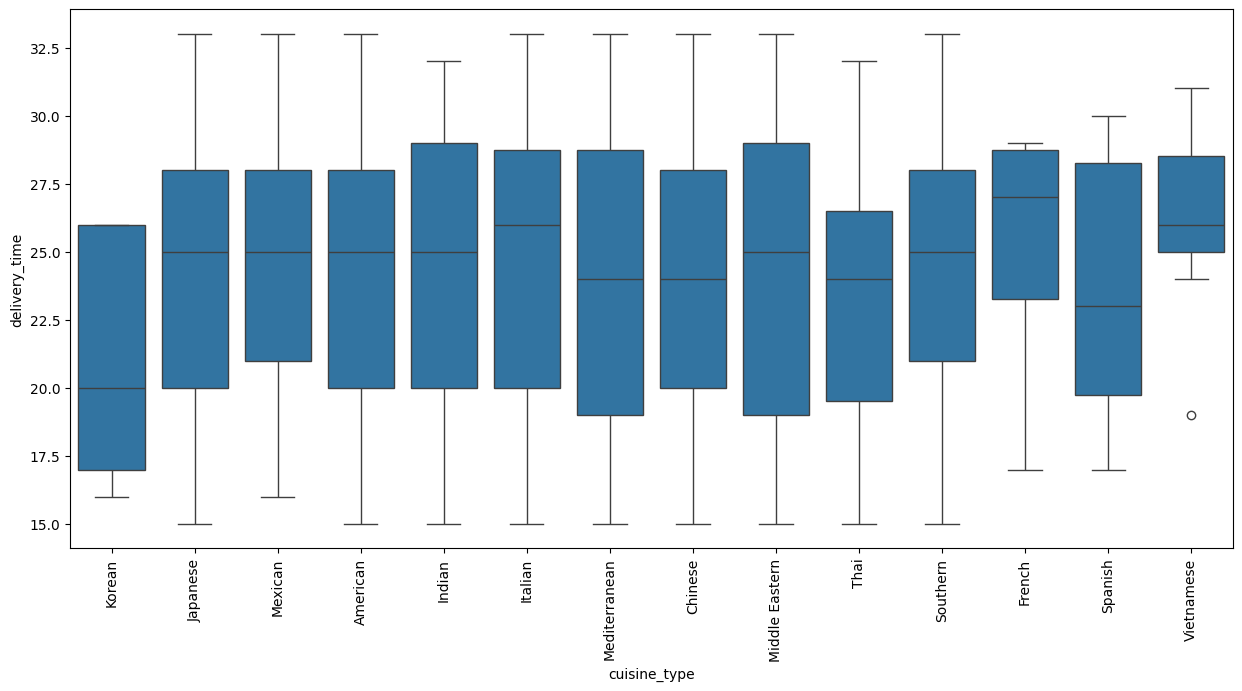

In [230]:
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type',y='delivery_time',data=df)
plt.xticks(rotation=90)
# Show the plot
plt.show()

**Observations:**\
There are outliers for delivery_time for vietnamese cuisines which is not as concerning.

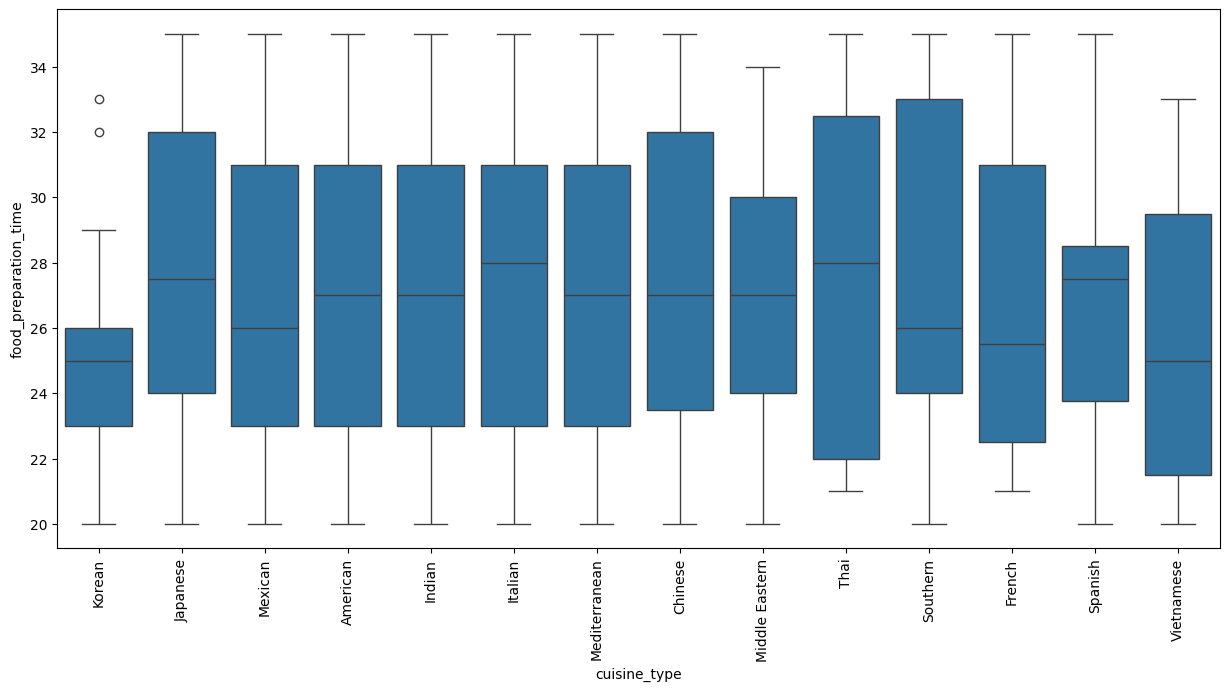

In [231]:
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type',y='food_preparation_time',data=df)
plt.xticks(rotation=90)
# Show the plot
plt.show()

**Observations:**
In general food preparation time is quite longer. Company should look into that.

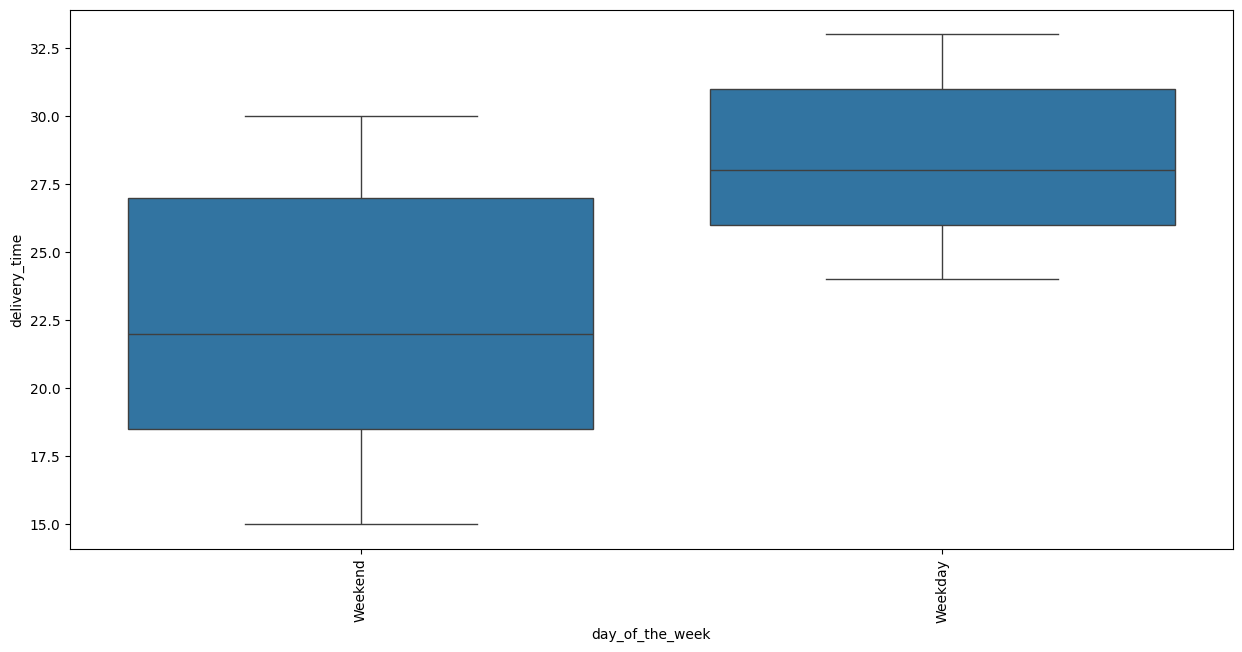

In [227]:
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week',y='delivery_time',data=df)
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Observations:**\
Delivery time on weekdays are longer as compared to weekends.
This data could be further divided into days of the weeks.

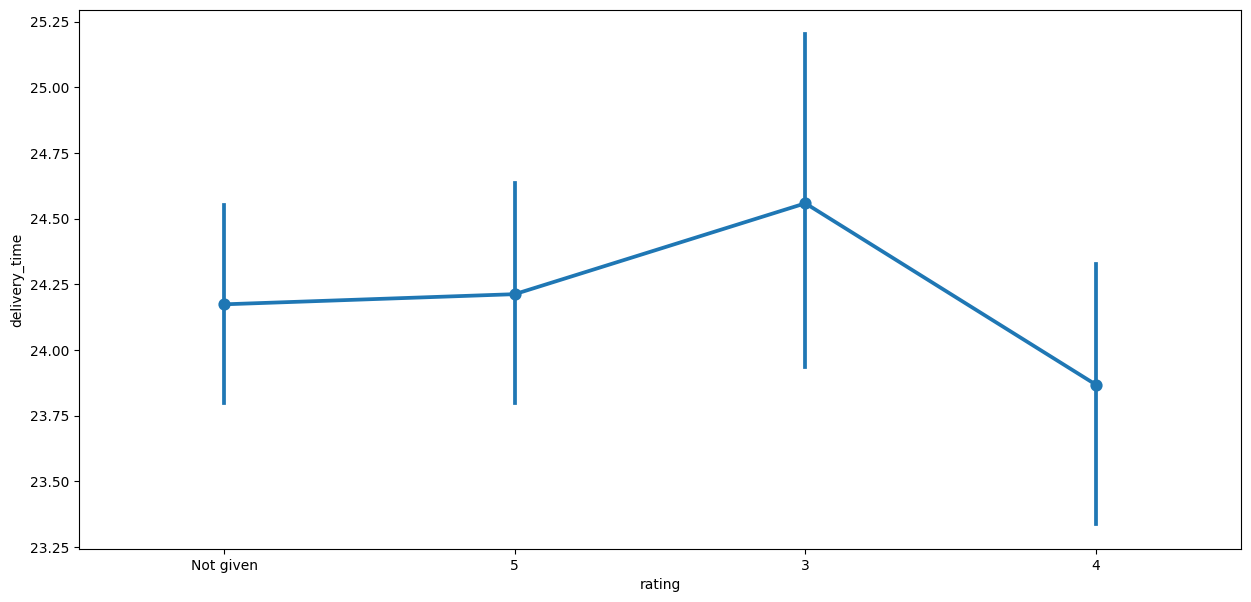

In [232]:
plt.figure(figsize=(15,7))
sns.pointplot(x='rating',y='delivery_time',data=df)

# Show the plot
plt.show()

**Observations:**\
Ratings is lower for the orders with the longer delivery time.

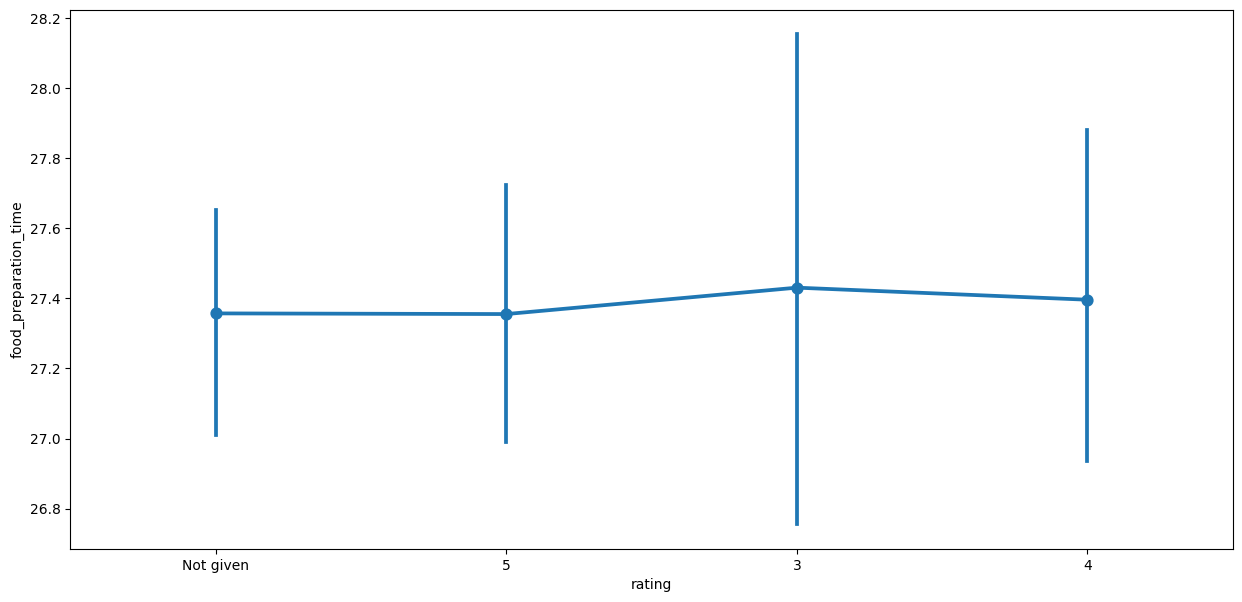

In [233]:
plt.figure(figsize=(15,7))
sns.pointplot(x='rating',y='food_preparation_time',data=df)

# Show the plot
plt.show()

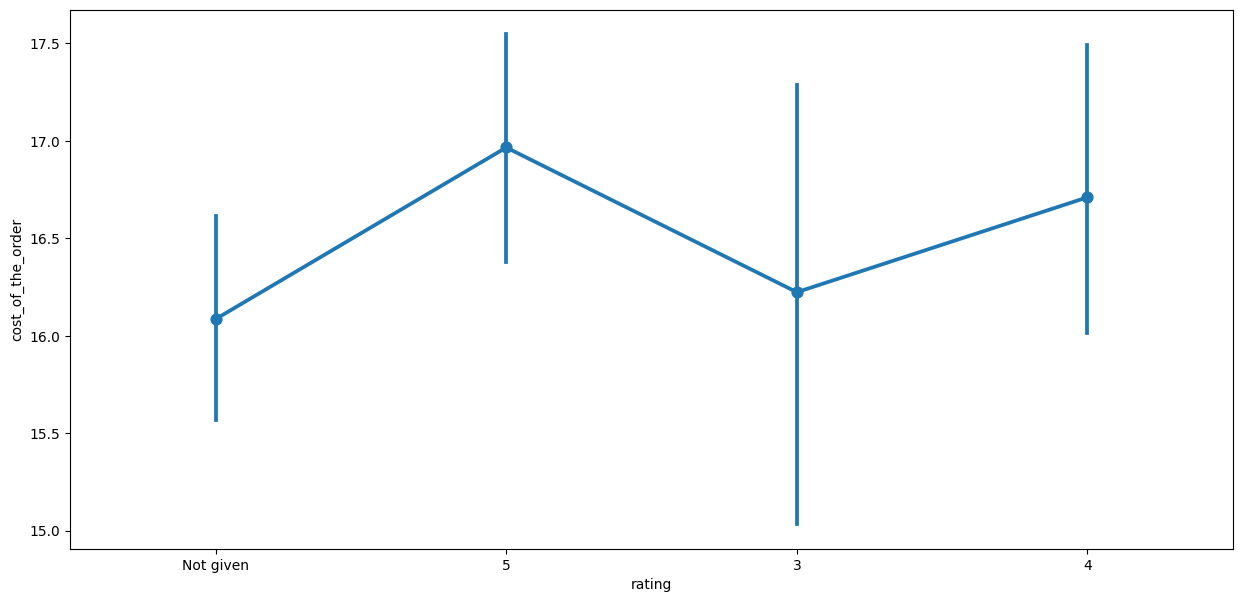

In [234]:
plt.figure(figsize=(15,7))
sns.pointplot(x='rating',y='cost_of_the_order',data=df)

# Show the plot
plt.show()

<Axes: >

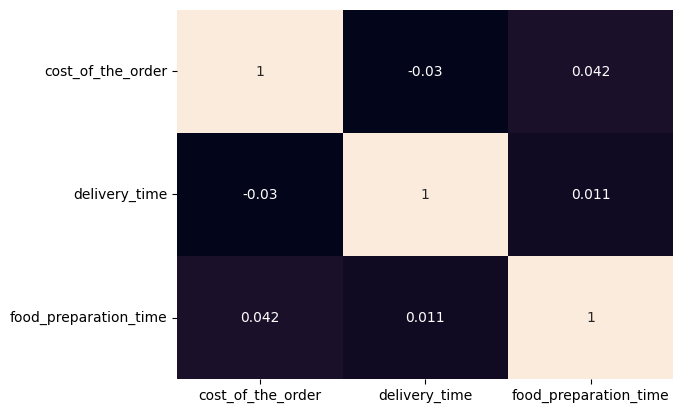

In [170]:
sns.heatmap(data=df[['cost_of_the_order','delivery_time','food_preparation_time']].corr(),annot=True,cbar=False)

**Observations:**\
Overall cost of the order is strongly correlated to delivery time and food preparation time. \
For order with high delivery time ratings are lower.\
Preparation times are long for all the orders, company should look into these insights.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [236]:
# Write the code here

df.drop_duplicates(inplace=True)
df_copy = df[df['rating'] != 'Not given'].copy()
df_copy['rating'] = pd.to_numeric(df_copy['rating'], errors='coerce')
data = df_copy.groupby(['restaurant_name'])['rating'].count()
sorted = data.sort_values(ascending=False)
list_restaurants = []
for restaurant, count in sorted.items():
    if count > 50:
        mean = df_copy.loc[df['restaurant_name']==restaurant]['rating'].mean()
        if mean > 4:
            list_restaurants.append(restaurant)
    else:
        break

print("Following is the list of restaurants which qualify for the promotional offer")
for restaurant in list_restaurants :
    print(restaurant + " qualify for the promotional offer")

Following is the list of restaurants which qualify for the promotional offer
Shake Shack qualify for the promotional offer
The Meatball Shop qualify for the promotional offer
Blue Ribbon Sushi qualify for the promotional offer
Blue Ribbon Fried Chicken qualify for the promotional offer


#### Observations:


There are 4 restaurants that qualify for this offer.\
In order to calculate this 736 orders which are not rated are ignored to make sure data is not influenced by missing values.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [237]:
# Write the code here
def calculate_revenue(cost):
    revenue = 0
    if cost >20:
        revenue = 0.25 * cost
    elif cost > 5:
        revenue = 0.15 * cost
    return revenue

df['revenue_of_the_order'] = df['cost_of_the_order'].apply(calculate_revenue)
total_revenue = df['revenue_of_the_order'].sum()
print("Total revenue of the company is "+str(round(total_revenue,2))+"$")

Total revenue of the company is 6166.3$


#### Observations:


As we observed earlier there are only 29.24% orders which cost more than 20$.\
Whereas 70% are less than 20$ so company can look into charging more to the lower cost orders and probably less to the higher cost orders.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

Percentage of the orders that take more than 60 minutes are 10.537407797681771


<Axes: xlabel='total_time'>

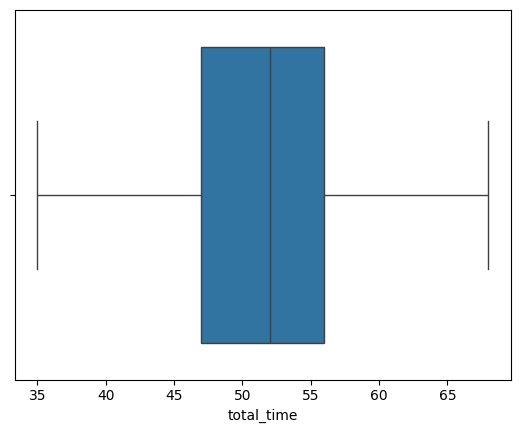

In [238]:
# Write the code here
df['total_time'] = df['food_preparation_time']+df['delivery_time']
total_count = df.count()[0]
more_than_60_min = df.loc[df['total_time']>60].count()[0]
percentage = (more_than_60_min/total_count)*100
print("Percentage of the orders that take more than 60 minutes are "+ str(percentage))
# To analyze the result calculated let's plot the boxplot for total_time
sns.boxplot(data=df,x='total_time')

#### Observations:


There are 10.53% orders that take longer than 60 minutes to get prepared and then delivered. 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [174]:
# Write the code here
data = df.groupby(['day_of_the_week'])['delivery_time'].mean()
print(data)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:


Average deliver time over the weekday is 28.34 minutes. \
Average delivery time over the weekend is 22.47 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are 1200 unique customer's orders which is 63% of all the orders.
*  Average food preparation time is 27.37 minutes.
*  Average delivery time is 24.16 minutes.
*  Amercan cuisine is the most popular cuisine.
*  There are restaurants with very low number of orders placed.
*  736 orders are not rated that resulted in almost 39% orders not rated.
*  Ratings are lower for the orders where delivery times are higher.
*  70% orders cost less than 20$.

### Recommendations:

*  Company should collect more ratings data as 39% of data does not have any ratings.
*  Company should look into ways to increase the number of frequent customers. Provide discounts to returning customers.
*  Food preparation time is long, that is resulting in lower rating. Comapny can look into improving the food prepation time by collaborating with the restaurants.
*  Delivery time can be improved that can result in better ratings for the restaurants.
*  Comapny can investigate as to why some restaurants have awfully lower number of orders.
*  Comopany can look into charging more to the orders which are less than 20 dollars as 70% orders are less than 20$.

---